# Partially Labelled UMAP

In [1]:
%%capture
!pip install -U sentence-transformers
!pip install umap-learn
!pip install transformers

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

from celluloid import Camera

from sentence_transformers import SentenceTransformer

from umap import UMAP
from IPython.display import HTML

### Load Data and Create Vectors

In [3]:
%%capture
data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
embedder = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = embedder.encode(data.data)
embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

In [17]:
def create_embeddings_array(embeddings, data):
    out = []
    num_examples = data.target.shape[0]
    for i in np.linspace(1, 0, num=11):

        data2mask = np.random.choice(range(num_examples),
                                     size=int(num_examples * i),
                                     replace=False)
        masked_target = data.target.copy()
        masked_target[data2mask] = -1

        dim_red = UMAP().fit(embeddings, y=masked_target)
        out.append(dim_red.embedding_.T)
    return np.array(out)

In [18]:
embeddings_array = create_embeddings_array(embeddings, data)

## Animate!

MovieWriter ffmpeg unavailable; using Pillow instead.


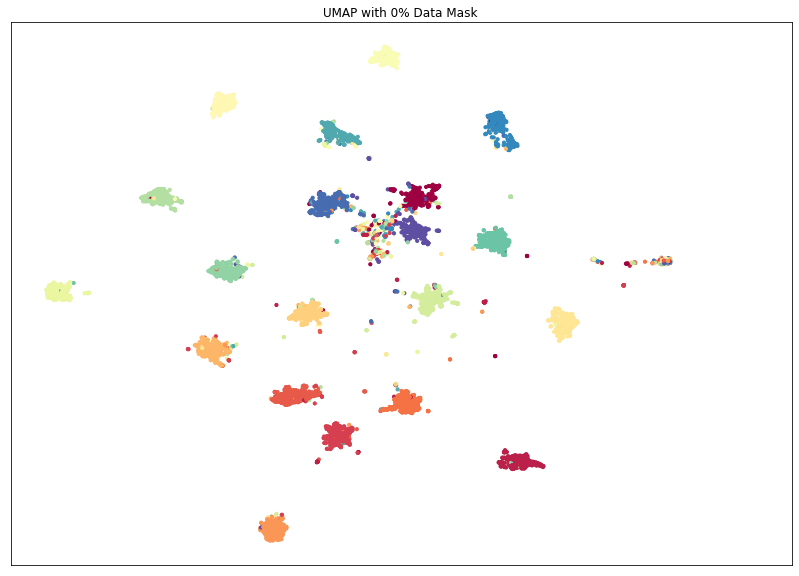

In [59]:
fig, ax = plt.subplots(figsize=(14, 10))

plt.setp(ax, xticks=[], yticks=[])


camera = Camera(fig)
mask_percs = np.linspace(1, 0, num=11)

for i, perc_mask in enumerate(mask_percs):
    t = plt.scatter(*embeddings_array[i, :], s=10, c=data.target, 
                cmap='Spectral', alpha=1.0)
    
    ax.text(0.4, 1.01, f'UMAP with {int(perc_mask*100)}% Data Mask', fontsize=12, transform=ax.transAxes)
    
    camera.snap()

anim = camera.animate(interval=1000)
anim.save('scatter.gif')